In [2]:
import pandas as pd

In [42]:
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import pymupdf

In [43]:
def get_text_with_links(document):
    result_text = ""
    
    for page_num in range(len(document)):
        page = document.load_page(page_num)

        # Получаем слова и их координаты
        words = page.get_text("words")
        links = page.get_links()

        # Временный словарь для отслеживания последнего индекса слова для каждого URL
        last_occurrence_with_url = {}

        wc_map = {tuple(word[:4]): word[4] for word in words}
        
        for link in links:
            link_rect = pymupdf.Rect(link["from"])
            uri = link.get('uri', 'Нет ссылки')
            
            for i, word in enumerate(words):
                text = word[4]   # текст слова
                word_rect = pymupdf.Rect(word[:4])

                # Проверка на пересечение координат
                if word_rect.intersects(link_rect):
                    last_occurrence_with_url[uri] = (i, tuple(word[:4]))

        # Заменяем текст в конечном словаре ссылками на последних вхождениях
        for uri, (index, rect) in last_occurrence_with_url.items():
            wc_map[rect] = f'{wc_map[rect]}:"{uri}"'

        # Сортировка слов по их координатам для правильного порядка
        sorted_words = sorted(wc_map.items(), key=lambda x: (x[0][1], x[0][0]))

        for item in sorted_words:
            result_text += item[1] + " "
    
    return result_text.strip()  # добавляем strip для удаления лишних пробелов в конце

In [4]:
def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large', device_map="cuda")
model = AutoModel.from_pretrained('intfloat/multilingual-e5-large', device_map="cuda")

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

In [144]:
df = pd.read_csv('/root/docker_llama/interns_preprocessed_multiclass/interns_preprocessed_multiclass.csv', encoding='utf-8').dropna().reset_index(drop=True)

<Axes: ylabel='Frequency'>

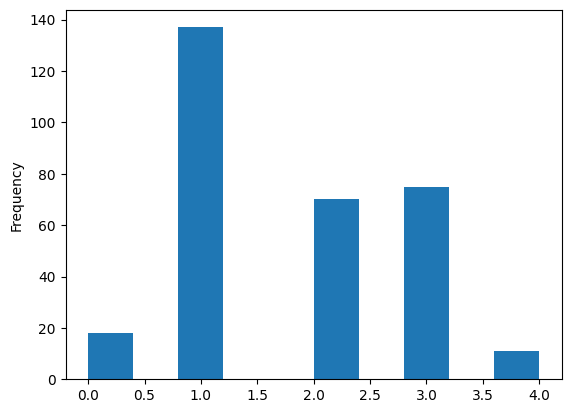

In [145]:
df['Hire status'].plot(kind='hist')

In [146]:
df['text']=None
df['embedding']=None

In [147]:
df['Резюме'] = df['Резюме'].apply(lambda x: '/root/docker_llama/'+x)

In [148]:
for i, pdf_file in enumerate(tqdm(df['Резюме'])):
    pdf_file = pdf_file.replace('\\', '/')
    #print(pdf_file)
    try:
        with pymupdf.open(pdf_file) as doc:
            text = get_text_with_links(doc)
    except:
        print('битый файл')
        continue
    
    batch_dict = tokenizer(text, max_length=512, padding=True, truncation=True, return_tensors='pt').to('cuda')
    embeddings = average_pool(model(**batch_dict).last_hidden_state, batch_dict['attention_mask'])
    df.loc[i, ['text']] = [text]
    df.loc[i, ['embedding']] = [embeddings.tolist()]

  2%|▏         | 5/311 [00:00<00:20, 15.23it/s]

битый файл


 62%|██████▏   | 194/311 [00:12<00:07, 16.25it/s]

битый файл


 74%|███████▍  | 231/311 [00:15<00:04, 19.51it/s]

битый файл


 82%|████████▏ | 256/311 [00:16<00:03, 17.87it/s]

битый файл


100%|██████████| 311/311 [00:20<00:00, 14.88it/s]

битый файл


In [149]:
df['label'] = df['Hire status']

In [150]:
df = df.dropna().reset_index(drop=True)

In [152]:
import numpy as np

In [153]:
df['0embedding'] = df['embedding'].apply(lambda x: x[0])

In [128]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


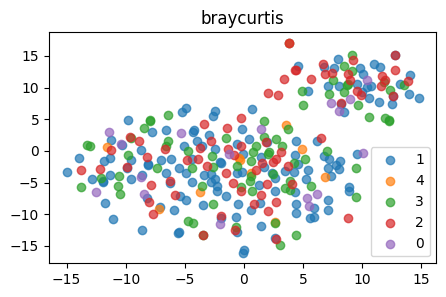

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


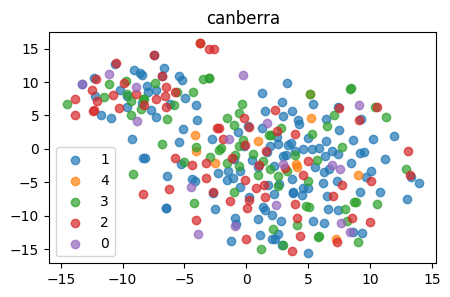

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


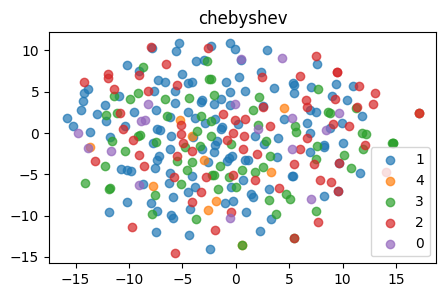

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


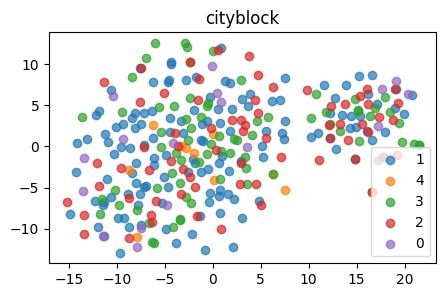

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


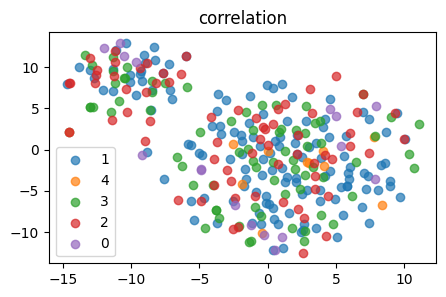

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


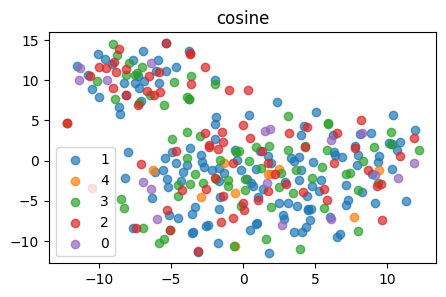

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


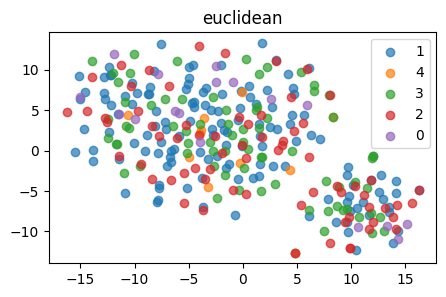

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


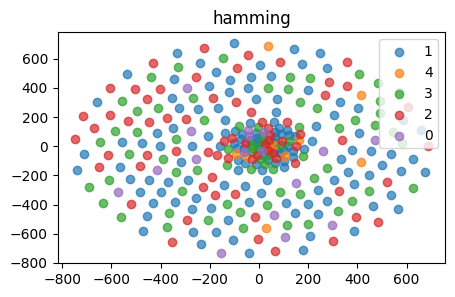

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


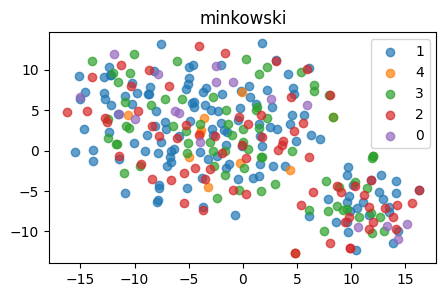

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


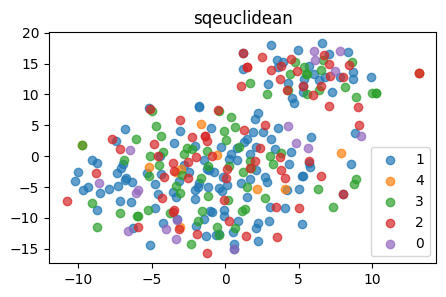

In [137]:
from sklearn.manifold import TSNE

for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean']:
    try:
        tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric)
        embeddings2d = tsne.fit_transform(np.array(df['0embedding'].to_list()))
        embeddingsdf = pd.DataFrame()
        embeddingsdf['label'] = df['label']
        embeddingsdf['x'] = embeddings2d[:,0]
        embeddingsdf['y'] = embeddings2d[:,1]
        fig, ax = plt.subplots(figsize=(5, 3))
    
        for label in embeddingsdf['label'].unique():
            subset = embeddingsdf[embeddingsdf['label'] == label]
            ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
        
        plt.title(f'{curmetric}')
        plt.legend()  # Show the legend with labels
        plt.show()
    except:
        pass

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


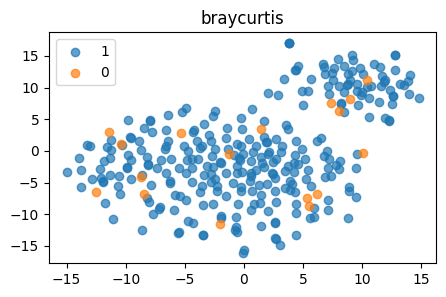

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


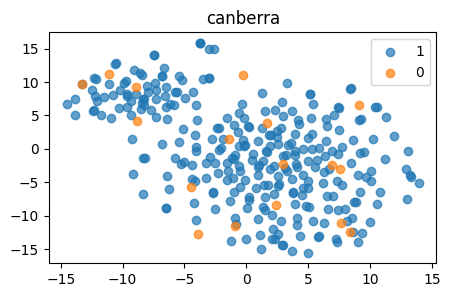

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


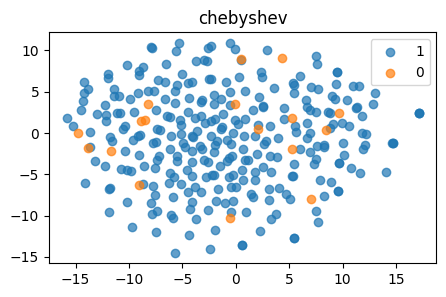

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


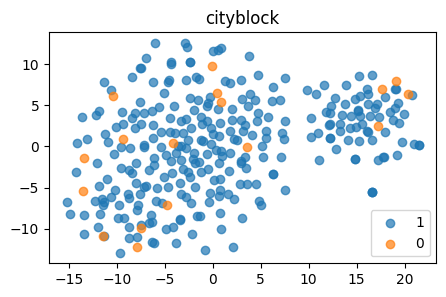

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


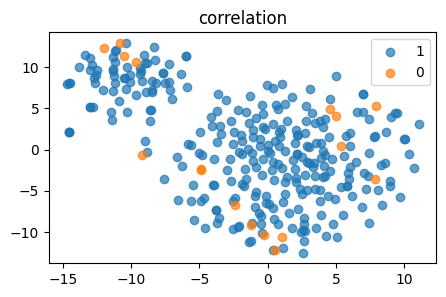

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


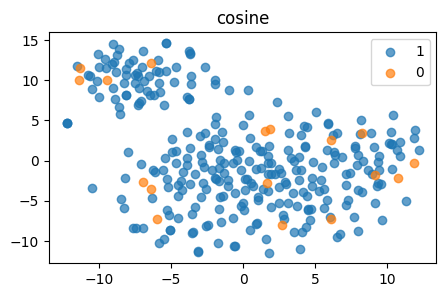

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


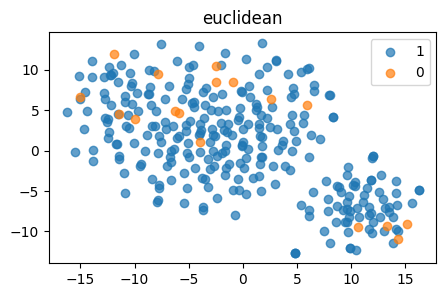

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


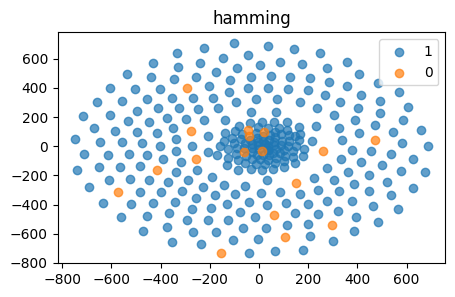

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


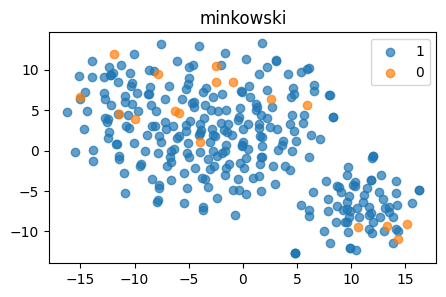

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


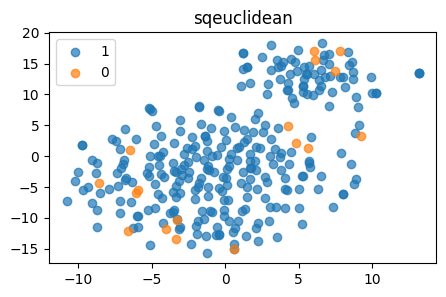

In [159]:
from sklearn.manifold import TSNE

for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean']:
    try:
        tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric)
        embeddings2d = tsne.fit_transform(np.array(df['0embedding'].to_list()))
        embeddingsdf = pd.DataFrame()
        embeddingsdf['label'] = [0 if i<1 else 1 for i in df['label']]
        embeddingsdf['x'] = embeddings2d[:,0]
        embeddingsdf['y'] = embeddings2d[:,1]
        fig, ax = plt.subplots(figsize=(5, 3))
    
        for label in embeddingsdf['label'].unique():
            subset = embeddingsdf[embeddingsdf['label'] == label]
            ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
        
        plt.title(f'{curmetric}')
        plt.legend()  # Show the legend with labels
        plt.show()
    except:
        pass

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


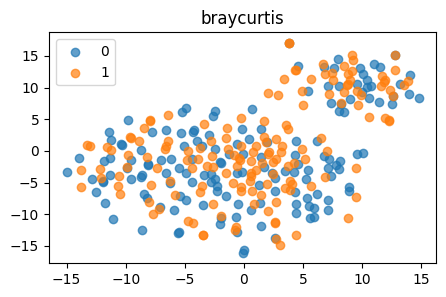

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


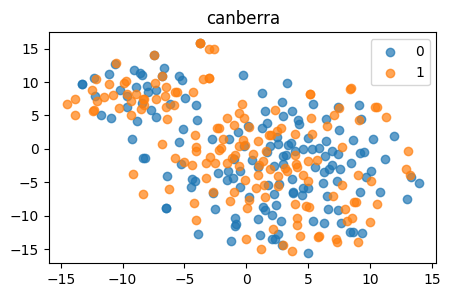

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


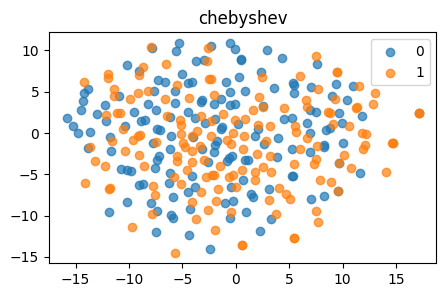

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


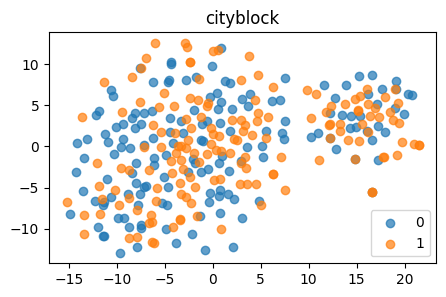

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


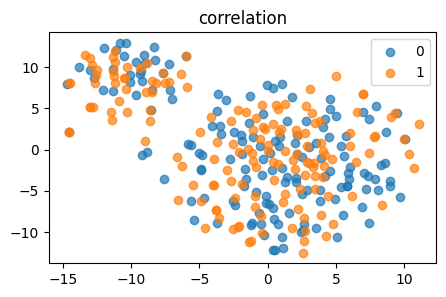

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


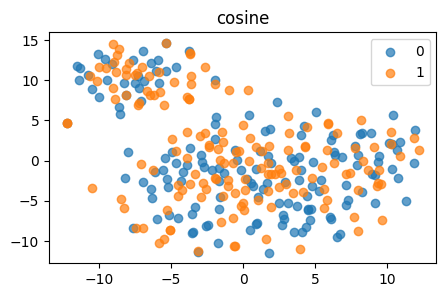

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


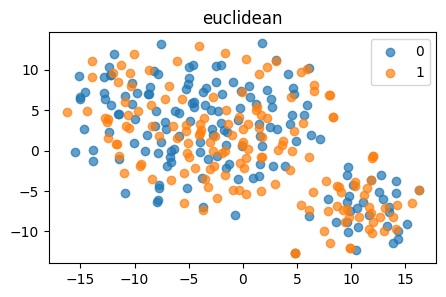

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


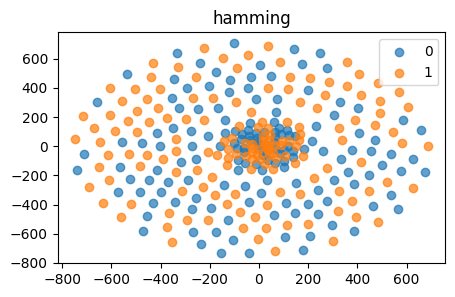

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


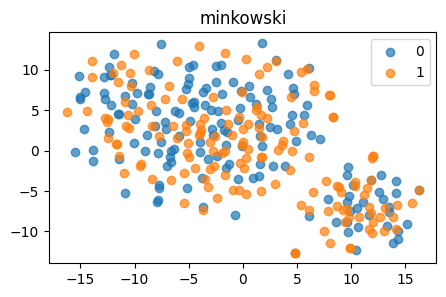

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


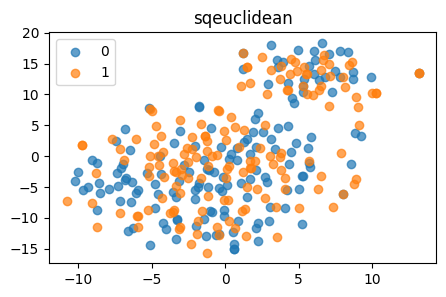

In [158]:
from sklearn.manifold import TSNE

for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean']:
    try:
        tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric)
        embeddings2d = tsne.fit_transform(np.array(df['0embedding'].to_list()))
        embeddingsdf = pd.DataFrame()
        embeddingsdf['label'] = [0 if i<2 else 1 for i in df['label']]
        embeddingsdf['x'] = embeddings2d[:,0]
        embeddingsdf['y'] = embeddings2d[:,1]
        fig, ax = plt.subplots(figsize=(5, 3))
    
        for label in embeddingsdf['label'].unique():
            subset = embeddingsdf[embeddingsdf['label'] == label]
            ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
        
        plt.title(f'{curmetric}')
        plt.legend()  # Show the legend with labels
        plt.show()
    except:
        pass

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


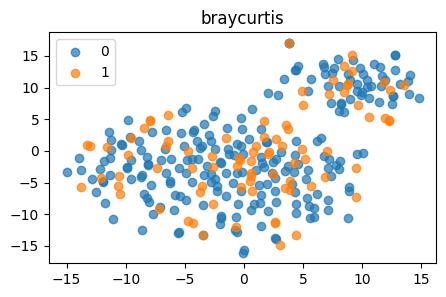

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


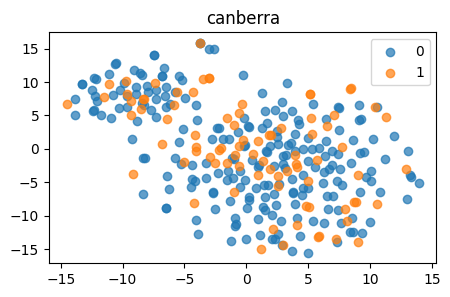

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


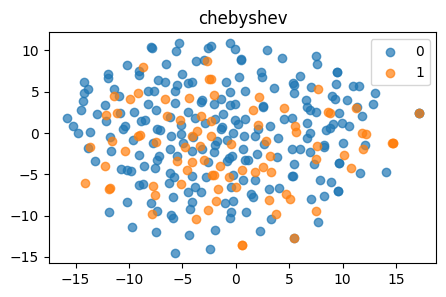

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


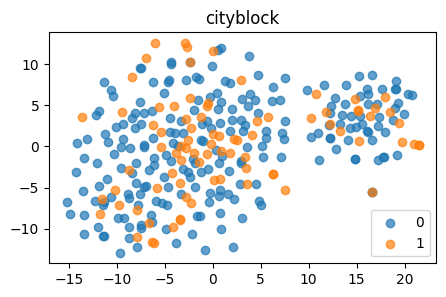

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


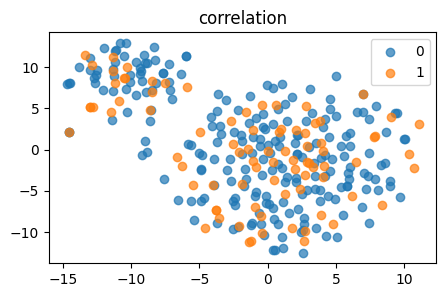

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


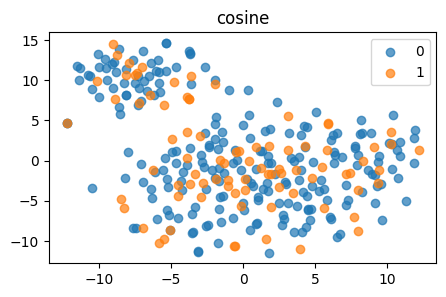

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


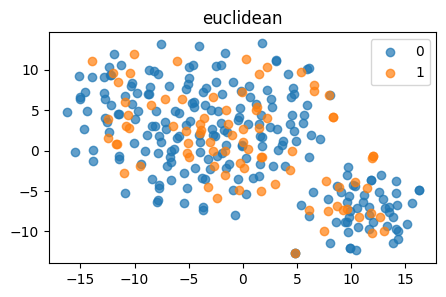

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


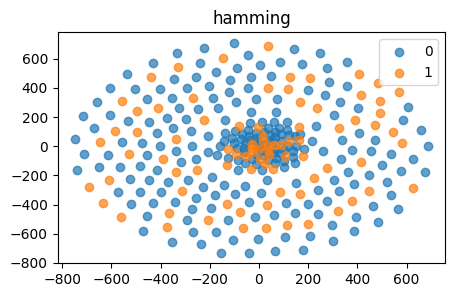

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


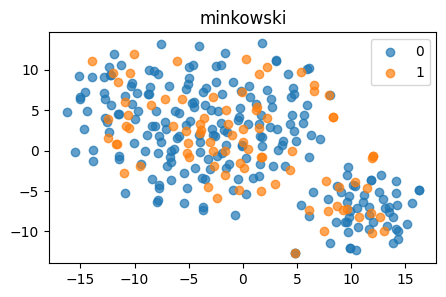

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


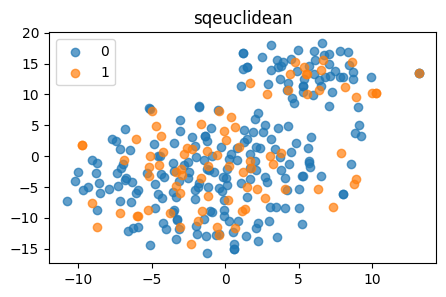

In [160]:
from sklearn.manifold import TSNE

for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean']:
    try:
        tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric)
        embeddings2d = tsne.fit_transform(np.array(df['0embedding'].to_list()))
        embeddingsdf = pd.DataFrame()
        embeddingsdf['label'] = [0 if i<3 else 1 for i in df['label']]
        embeddingsdf['x'] = embeddings2d[:,0]
        embeddingsdf['y'] = embeddings2d[:,1]
        fig, ax = plt.subplots(figsize=(5, 3))
    
        for label in embeddingsdf['label'].unique():
            subset = embeddingsdf[embeddingsdf['label'] == label]
            ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
        
        plt.title(f'{curmetric}')
        plt.legend()  # Show the legend with labels
        plt.show()
    except:
        pass

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


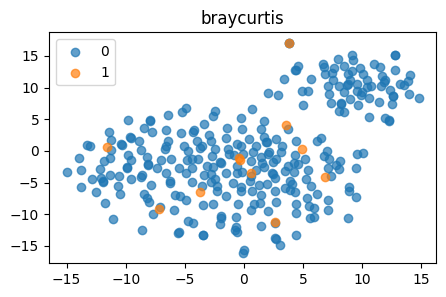

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


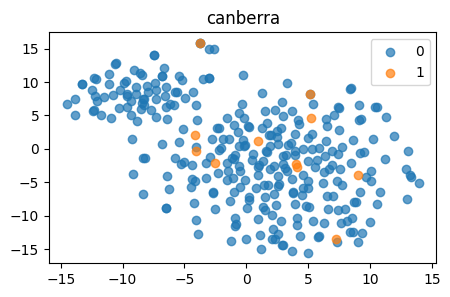

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


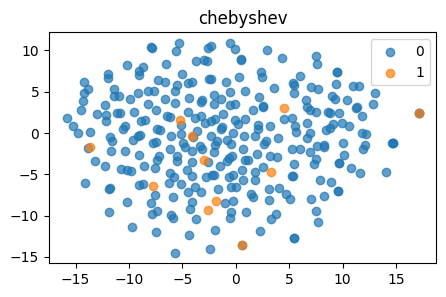

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


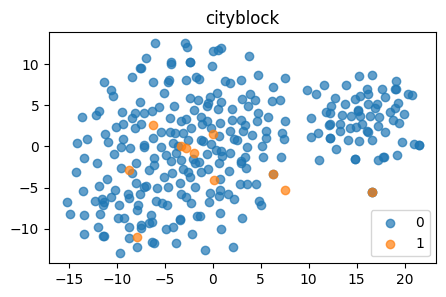

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


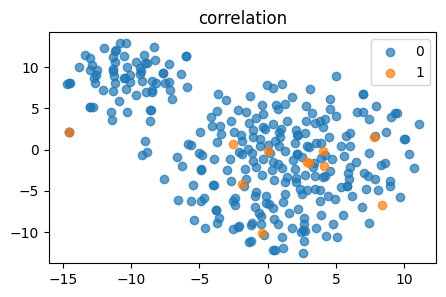

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


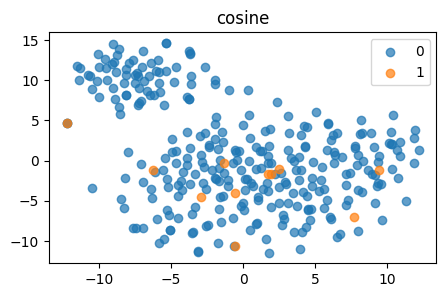

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


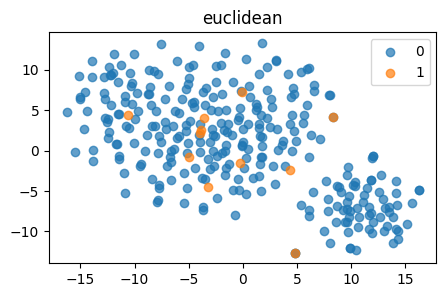

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


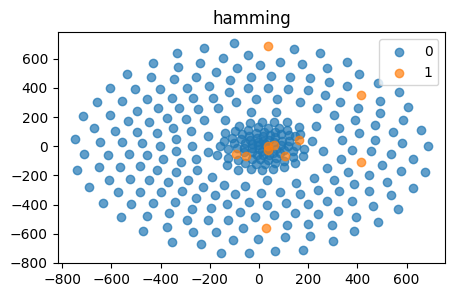

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


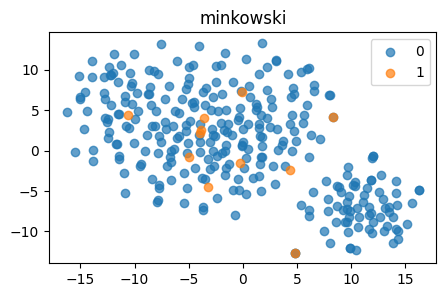

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


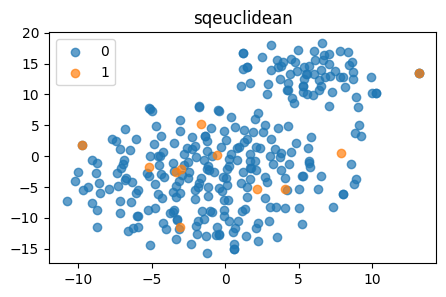

In [161]:
from sklearn.manifold import TSNE

for curmetric in ['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'euclidean', 'hamming', 'jensenshannon', 'kulczynski1', 'mahalanobis', 'matching', 'minkowski', 'seuclidean', 'sqeuclidean']:
    try:
        tsne = TSNE(random_state = 42, n_iter = 10000, metric = curmetric)
        embeddings2d = tsne.fit_transform(np.array(df['0embedding'].to_list()))
        embeddingsdf = pd.DataFrame()
        embeddingsdf['label'] = [0 if i<4 else 1 for i in df['label']]
        embeddingsdf['x'] = embeddings2d[:,0]
        embeddingsdf['y'] = embeddings2d[:,1]
        fig, ax = plt.subplots(figsize=(5, 3))
    
        for label in embeddingsdf['label'].unique():
            subset = embeddingsdf[embeddingsdf['label'] == label]
            ax.scatter(subset['x'], subset['y'], alpha=0.7, label=label)
        
        plt.title(f'{curmetric}')
        plt.legend()  # Show the legend with labels
        plt.show()
    except:
        pass

In [155]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine

def build_correlation_matrix(df, embedding_col='0embedding', label_col='label'):
    """
    Строит матрицу корреляций между эмбеддингами и предоставляет средние значения
    внутриклассовых и межклассовых корреляций.

    Args:
        df: Pandas DataFrame с эмбеддингами и метками.
        embedding_col: Название столбца с эмбеддингами.
        label_col: Название столбца с метками классов.

    Returns:
        Словарь с результатами:
        - correlation_matrix: Матрица корреляций (Pandas DataFrame).
        - intra_class_correlation: Средняя корреляция внутри каждого класса.
        - inter_class_correlation: Средняя корреляция между разными классами.
        - intra_class_correlations_by_label: Словарь, где ключ - метка класса, значение - средняя корреляция внутри этого класса.
    """

    num_embeddings = len(df)
    correlation_matrix = np.zeros((num_embeddings, num_embeddings))

    for i in range(num_embeddings):
        for j in range(num_embeddings):
            embedding1 = np.array(df.iloc[i][embedding_col])
            embedding2 = np.array(df.iloc[j][embedding_col])
            correlation_matrix[i, j] = 1 - cosine(embedding1, embedding2)
            # Для диагональных элементов (корреляция с самим собой) установим 1.0
            if i==j : correlation_matrix[i,j]=1.0

    correlation_df = pd.DataFrame(correlation_matrix)
    correlation_df.index = df.index
    correlation_df.columns = df.index
    # Добавление информации о метках классов
    correlation_df['label'] = df[label_col]
    correlation_df.insert(0, 'label', correlation_df.pop('label'))

    # Расчет средних внутриклассовых и межклассовых корреляций
    labels = df[label_col].unique()
    intra_class_correlations_by_label = {}
    inter_class_correlations = []

    for label in labels:
        label_indices = df[df[label_col] == label].index
        intra_class_correlations = []
        for i in label_indices:
          for j in label_indices:
              if i != j :
                intra_class_correlations.append(correlation_matrix[i, j])

        intra_class_correlations_by_label[label] = np.mean(intra_class_correlations) if intra_class_correlations else np.nan

    for i in range(num_embeddings):
      for j in range(num_embeddings):
          if i != j:
              label1 = df.iloc[i][label_col]
              label2 = df.iloc[j][label_col]
              if label1 != label2:
                  inter_class_correlations.append(correlation_matrix[i, j])

    intra_class_correlation = np.nanmean(list(intra_class_correlations_by_label.values()))
    inter_class_correlation = np.mean(inter_class_correlations) if inter_class_correlations else 0

    return {
        "correlation_matrix": correlation_df,
        "intra_class_correlation": intra_class_correlation,
        "inter_class_correlation": inter_class_correlation,
        "intra_class_correlations_by_label": intra_class_correlations_by_label
    }

In [156]:
result = build_correlation_matrix(df)
print("Матрица корреляций:\n", result["correlation_matrix"])
print("\nСредняя внутриклассовая корреляция:", result["intra_class_correlation"])
print("\nСредняя межклассовая корреляция:", result["inter_class_correlation"])
print("\nСредние внутриклассовые корреляции по меткам:\n", result["intra_class_correlations_by_label"])

Матрица корреляций:
      label         0         1         2         3         4         5  \
0        1  1.000000  0.844182  0.841667  0.846093  0.873479  0.843232   
1        1  0.844182  1.000000  0.870484  0.853473  0.855107  0.864566   
2        4  0.841667  0.870484  1.000000  0.861764  0.861069  0.871295   
3        3  0.846093  0.853473  0.861764  1.000000  0.840465  0.867557   
4        2  0.873479  0.855107  0.861069  0.840465  1.000000  0.863783   
..     ...       ...       ...       ...       ...       ...       ...   
301      1  0.821013  0.859130  0.860064  0.874626  0.837607  0.844992   
302      3  0.835942  0.871536  0.868426  0.861277  0.867903  0.882829   
303      1  0.846140  0.865561  0.864714  0.859804  0.871284  0.868174   
304      1  0.844116  0.848650  0.866840  0.859559  0.865552  0.869712   
305      3  0.863537  0.859136  0.891023  0.850717  0.874526  0.864726   

            6         7         8  ...       296       297       298  \
0    0.823544  0.8